# Python Implementation for Linear Regression
1. Simple linear regression model with OLS and Gradient descent optimization 
2. Comparision of implemented model performance with SKLearn model. 
3. Evaluation done using R2 Score 

### 1. Import libraries 

In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from IPython.display import HTML
%matplotlib inline

from sklearn.linear_model import LinearRegression  ##for performance comparision

### 2. Use dummy data set 

X.shape = (1000, 1) y.shape = (1000,)
Initial scatter plot


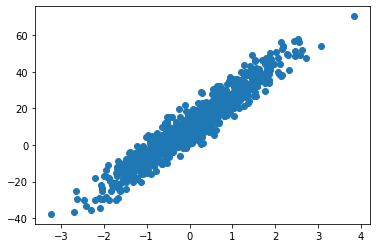

In [2]:
#Dummy dataset
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, random_state=42, noise=5, bias=10) 
print ('X.shape = %s y.shape = %s' %(X.shape, y.shape))

print ("Initial scatter plot")
plt.scatter(X[:,0],y)
plt.show()

### 3. Model Class implementation 

In [3]:
class LinearRegressionModel:
    """
    Linear Regression Model Class
    
    """
    def __init__(self):
        pass

    def fit(self, X, y, lr = 0.01, n_iters = 1000, Verbose=False, get_para=False, algo='gd'):
        self.algo = algo
        if (algo == 'gd'):
            """

            Trains a linear regression model using gradient descent

            """

            (n_samples, self.n_features) = X.shape
            self.num_sample = n_samples
            self.W = np.zeros(shape=(self.n_features,1))
            self.b = 0
            self.weights = []
            self.bias = []
            self.X = X
            self.y = y
            self.costs = []

            for i in range(n_iters):
                """"
                1. Compute y hat
                """
                y_hat = (np.dot(X, self.W) + self.b)[:,0]

                """
                2. find Cost error
                """
                cost = (1 / n_samples) * np.sum((y_hat - y)**2)
                self.costs.append(cost)

                """
                3. Verbose: Description of cost at each iteration
                """
                if Verbose == True:
                    print("Cost at iteration {0}: {1}".format(i,cost))

                """
                4. Updating the derivative
                """
                dw = (2 / n_samples) * np.dot(X.T, (y_hat - y).reshape(-1,1))
                db = (2 / n_samples) * np.sum((y_hat - y)) 

                """"
                5. Updating weights and bias
                """
                self.W = self.W - lr * dw
                self.b = self.b - lr * db

                """
                6. Save the weights for visualisation
                """
                self.weights.append(self.W)
                self.bias.append(self.b)
            print('Training Completed.....')
            if get_para == True:
                return self.W, self.b, self.costs
            
        elif(algo == 'ols'):
            
            (n_samples, self.n_features) = X.shape
            self.num_sample = n_samples
            self.y = y
            
            X = np.c_[np.ones((n_samples)), X]
            self.X = X
            self.W = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
            self.b = 0
            
            print('Training Completed.....')
            if get_para == True:
                return self.W, self.b

    def predict(self, X_test):
        """
        1. Predicting the values by using Linear Regression Model
        """
        if(self.algo == 'ols'):
            (n_samples_test, n_feature_test) = X_test.shape
            X_test = np.c_[np.ones((n_samples_test)), X_test]
            return (np.dot(X_test, self.W))
        elif(self.algo == 'gd'):  
            return (np.dot(X_test, self.W)+self.b)[:,0]
    def plot_cost(self):
        """
        1. Plotting cost with each iteration 
        """
        if(self.algo == 'gd'):
            #Plot the cost function...
            plt.title('Cost Function J')
            plt.xlabel('No. of iterations')
            plt.ylabel('Cost')
            plt.plot(self.costs)
            plt.show()
        elif(self.algo == 'ols'):
            print('Can not print cost while algo = "ols"')

    def plotLine(self):
        if(self.algo == 'gd'):
            max_x = np.max(self.X[:,0])
            min_x = np.min(self.X[:,0])

            xplot = np.linspace(min_x, max_x, self.num_sample)
            yplot = self.b + self.W[0] * xplot

            plt.plot(xplot, yplot, color='#58b970', label='Regression Line')

            plt.title('Visualise line fit')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.scatter(self.X[:,0],self.y)
            plt.show()
        elif(self.algo == 'ols'):
            max_x = np.max(self.X[:,1])
            min_x = np.min(self.X[:,1])

            xplot = np.linspace(min_x, max_x, self.num_sample)
            yplot = self.W[0] + self.W[1] * xplot

            plt.plot(xplot, yplot, color='#58b970', label='Regression Line')

            plt.title('Visualise line fit')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.scatter(self.X[:,1],self.y)
            plt.show()

### 4. Train - Test split for performance check 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X-Train Data,Number of Features: {}".format(X_train.shape))
print("y_train Data,Number of Features: {}".format(y_train.shape))
print("X_test Data,Number of Features: {}".format(X_test.shape))
print("y_test Data,Number of Features: {}".format(y_test.shape))

X-Train Data,Number of Features: (800, 1)
y_train Data,Number of Features: (800,)
X_test Data,Number of Features: (200, 1)
y_test Data,Number of Features: (200,)


### 5. Train using implemented model 

In [11]:
model = LinearRegressionModel()

model.fit(X_train, y_train, n_iters = 1000, algo='gd')

Training Completed.....


In [12]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print('Train R2:', train_r2)
print('Test R2:', test_r2)

Train R2: 0.9165963474945489
Test R2: 0.9131254978433995


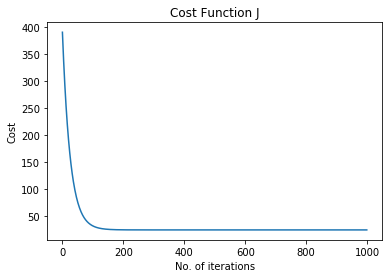

In [13]:
model.plot_cost()

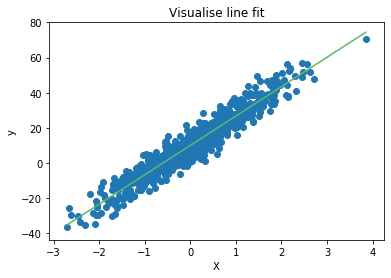

In [8]:
model.plotLine()

### 6. Train using sklearn model  

In [9]:
from sklearn.linear_model import LinearRegression

reg_ = LinearRegression()

reg_.fit(X_train, y_train)
    
train_pred = reg_.predict(X_train)
test_pred = reg_.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print('Train R2:', train_r2)
print('Test R2:', test_r2)

Train R2: 0.916596347494549
Test R2: 0.9131254977291062


In [10]:
from sklearn.linear_model import SGDRegressor

sgdreg_ = SGDRegressor()

sgdreg_.fit(X_train, y_train)
    
train_pred = sgdreg_.predict(X_train)
test_pred = sgdreg_.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print('Train R2:', train_r2)
print('Test R2:', test_r2)

Train R2: 0.9165961864158326
Test R2: 0.913126568962511


-----